In [ ]:
import numpy as np
import time
import matplotlib.pyplot as plt

In [ ]:
def rosenbrock(x):
    return (1 - x[0])**2 + 100*(x[1] - x[0]**2)**2

def grad_rosenbrock(x):
    dx = -2*(1 - x[0]) - 400*x[0]*(x[1] - x[0]**2)
    dy = 200*(x[1] - x[0]**2)
    return np.array([dx, dy])


In [ ]:
def sin_func(x):
    if abs(x) < 1e-6:
        return 0.0
    return np.sin(1/x)

def grad_sin_func(x):
    if abs(x) < 1e-6:
        return 0.0
    return -np.cos(1/x)/(x**2)


In [ ]:
def gradient_descent(f, grad, x0, alpha, max_iter=5000, tol=1e-6):
    x = x0.copy()
    history = []

    start = time.time()
    for i in range(max_iter):
        g = grad(x)
        history.append(f(x))
        if np.linalg.norm(g) < tol:
            break
        x -= alpha * g
    end = time.time()

    return x, f(x), history, end - start


In [ ]:
def momentum_gd(f, grad, x0, alpha, beta=0.9, max_iter=5000, tol=1e-6):
    x = x0.copy()
    v = np.zeros_like(x)
    history = []

    start = time.time()
    for _ in range(max_iter):
        g = grad(x)
        history.append(f(x))
        if np.linalg.norm(g) < tol:
            break
        v = beta * v + alpha * g
        x -= v
    end = time.time()

    return x, f(x), history, end - start


In [ ]:
def adagrad(f, grad, x0, alpha, eps=1e-8, max_iter=5000, tol=1e-6):
    x = x0.copy()
    G = np.zeros_like(x)
    history = []

    start = time.time()
    for _ in range(max_iter):
        g = grad(x)
        history.append(f(x))
        if np.linalg.norm(g) < tol:
            break
        G += g**2
        x -= alpha * g / (np.sqrt(G) + eps)
    end = time.time()

    return x, f(x), history, end - start


In [ ]:
def rmsprop(f, grad, x0, alpha, beta=0.9, eps=1e-8, max_iter=5000, tol=1e-6):
    x = x0.copy()
    G = np.zeros_like(x)
    history = []

    start = time.time()
    for _ in range(max_iter):
        g = grad(x)
        history.append(f(x))
        if np.linalg.norm(g) < tol:
            break
        G = beta * G + (1 - beta) * g**2
        x -= alpha * g / (np.sqrt(G) + eps)
    end = time.time()

    return x, f(x), history, end - start


In [ ]:
def adam(f, grad, x0, alpha, beta1=0.9, beta2=0.999, eps=1e-8,
         max_iter=5000, tol=1e-6):
    x = x0.copy()
    m = np.zeros_like(x)
    v = np.zeros_like(x)
    history = []

    start = time.time()
    for t in range(1, max_iter + 1):
        g = grad(x)
        history.append(f(x))
        if np.linalg.norm(g) < tol:
            break

        m = beta1 * m + (1 - beta1) * g
        v = beta2 * v + (1 - beta2) * (g ** 2)

        m_hat = m / (1 - beta1 ** t)
        v_hat = v / (1 - beta2 ** t)

        x -= alpha * m_hat / (np.sqrt(v_hat) + eps)
    end = time.time()

    return x, f(x), history, end - start


In [ ]:
def plot_history(history, title):
    plt.plot(history)
    plt.yscale("log")
    plt.xlabel("Iterations")
    plt.ylabel("f(x)")
    plt.title(title)
    plt.grid()
    plt.show()


Optimal x: [0.99997828 0.99995649]
f(x): 4.723752060117456e-10
Time: 0.16044068336486816


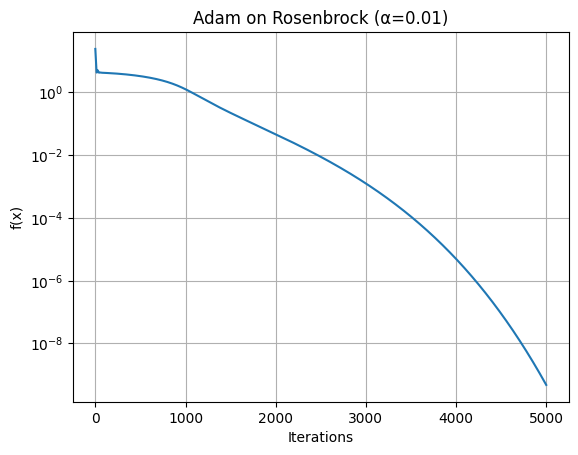

In [ ]:
x0 = np.array([-1.2, 1.0])
alpha = 0.01

x_star, f_star, hist, t = adam(
    rosenbrock, grad_rosenbrock, x0, alpha
)

print("Optimal x:", x_star)
print("f(x):", f_star)
print("Time:", t)

plot_history(hist, "Adam on Rosenbrock (α=0.01)")


In [ ]:
def plot_convergence(histories, labels, title):
    for h, lab in zip(histories, labels):
        plt.plot(h, label=lab)
    plt.yscale("log")
    plt.xlabel("Iterations")
    plt.ylabel("f(x)")
    plt.title(title)
    plt.legend()
    plt.grid()
    plt.show()


/tmp/ipython-input-310192850.py:2: RuntimeWarning: overflow encountered in scalar power
  return (1 - x[0])**2 + 100*(x[1] - x[0]**2)**2
/tmp/ipython-input-310192850.py:5: RuntimeWarning: overflow encountered in scalar power
  dx = -2*(1 - x[0]) - 400*x[0]*(x[1] - x[0]**2)
/tmp/ipython-input-310192850.py:6: RuntimeWarning: overflow encountered in scalar power
  dy = 200*(x[1] - x[0]**2)
/tmp/ipython-input-310192850.py:5: RuntimeWarning: invalid value encountered in scalar subtract
  dx = -2*(1 - x[0]) - 400*x[0]*(x[1] - x[0]**2)
/tmp/ipython-input-310192850.py:6: RuntimeWarning: invalid value encountered in scalar subtract
  dy = 200*(x[1] - x[0]**2)
/tmp/ipython-input-310192850.py:2: RuntimeWarning: invalid value encountered in scalar subtract
  return (1 - x[0])**2 + 100*(x[1] - x[0]**2)**2


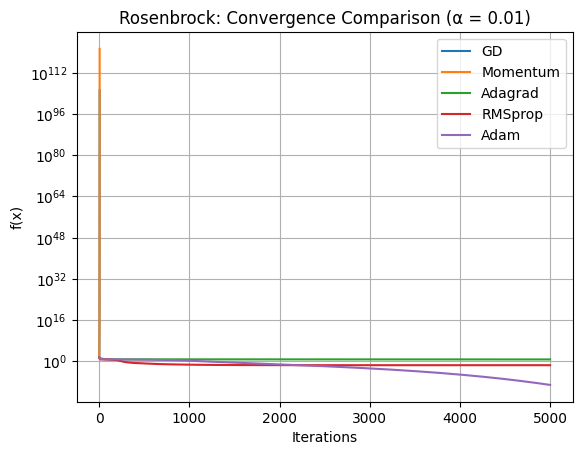

In [ ]:
x0 = np.array([-1.2, 1.0])
alpha = 0.01

results = []

results.append(gradient_descent(rosenbrock, grad_rosenbrock, x0, alpha))
results.append(momentum_gd(rosenbrock, grad_rosenbrock, x0, alpha))
results.append(adagrad(rosenbrock, grad_rosenbrock, x0, alpha))
results.append(rmsprop(rosenbrock, grad_rosenbrock, x0, alpha))
results.append(adam(rosenbrock, grad_rosenbrock, x0, alpha))

histories = [r[2] for r in results]
labels = ["GD", "Momentum", "Adagrad", "RMSprop", "Adam"]

plot_convergence(histories, labels,
                 "Rosenbrock: Convergence Comparison (α = 0.01)")


In [ ]:
for name, r in zip(labels, results):
    print(name, "Time:", round(r[3], 5),
          "Final f(x):", r[1])


GD Time: 0.06342 Final f(x): nan
Momentum Time: 0.03785 Final f(x): nan
Adagrad Time: 0.06115 Final f(x): 3.9224162804207507
RMSprop Time: 0.05376 Final f(x): 0.022155691428226883
Adam Time: 0.19459 Final f(x): 4.723752060117456e-10


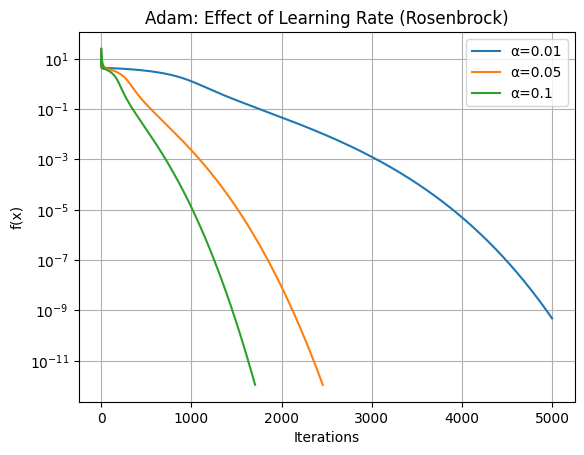

In [ ]:
# b part of result
alphas = [0.01, 0.05, 0.1]
histories = []

for a in alphas:
    _, _, hist, _ = adam(rosenbrock, grad_rosenbrock, x0, a)
    histories.append(hist)

plot_convergence(histories,
                 ["α=0.01", "α=0.05", "α=0.1"],
                 "Adam: Effect of Learning Rate (Rosenbrock)")
